# NuPlan Motion Data Analysis

## Brief Introduction to NuPlan Motion Dataset

NuPlan is the world's first large-scale planning benchmark for autonomous driving. The data is recorded over 4 cities - Boston, Pittsburgh, Singapore and Las Vegas. The nuPlan v1.0 dataset consists of over 15,000 logs and 1300+ hours of driving data. The nuPlan v1.1 dataset brings multiple improvements over the v1.0 dataset. Meanwhile, some log files are removed to guarantee the accuracy and reliability of the dataset.

NuPlan has its own toolkit package available at [nuplan-devkit](https://github.com/motional/nuplan-devkit/tree/master). The documentation of the devkit is [here](https://nuplan-devkit.readthedocs.io/_/downloads/en/latest/pdf/). This repository provides a data sample of nuPlan v1.1 including less than 1% of the original dataset. It also provides a visualized insight into the dataset. For those interested in the complete dataset, please follow this [link](https://www.nuscenes.org/nuplan#download).

### Structure of the Database File

![](../img/md/nuplan_schema.png)

In [1]:
import os
import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import sqlite3

from utils import nuplan

data_path = "../trajectory/NuPlan/data/cache/"
trajectory_folders = ["train_boston", "train_pittsburgh", "train_singapore", "train_vegas_1"]
test_folder = "test"
val_folder = "val"

map_path = "../trajectory/NuPlan/maps"
map_files = [
    "us-ma-boston/9.12.1817/map.gpkg",
    "us-pa-pittsburgh-hazelwood/9.17.1937/map.gpkg",
    "sg-one-north/9.17.1964/map.gpkg",
    "us-nv-las-vegas-strip/9.15.1915/map.gpkg",
]

trajectory_files = []
for folder in trajectory_folders:
    file_list = os.listdir(data_path + folder)
    trajectory_files.append(file_list)
    print(folder, len(file_list))

test_file_list = os.listdir(data_path + test_folder)
val_file_list = os.listdir(data_path + val_folder)
print(test_folder, len(test_file_list))
print(val_folder, len(val_file_list))

train_boston 1648
train_pittsburgh 1560
train_singapore 2396
train_vegas_1 1750
test 1349
val 1381


### Trajectory Types in NuPlan

The dynamic objects recorded in NuPlan include

- `vehicle`: Includes all four or more wheeled vehicles, as well as trailers.
- `bicycle`: Includes bicycles, motorcycles and tricycles.
- `pedestrian`: All types of pedestrians, incl. strollers and wheelchairs.
- `generic object`: Animals, debris, pushable/pullable objects, permanent poles.

The static objects recorded in NuPlan include

- `traffic_cone`: Cones that are temporarily placed to control the flow of traffic.
- `barrier`: Solid barriers that can be either temporary or permanent.
- `czone_sign`: Temporary signs that indicate construction zones.

In [2]:
sample_db = sqlite3.connect(data_path + trajectory_folders[0] + "/" + trajectory_files[0][0])
df_category = pd.read_sql_query("SELECT * FROM category;", sample_db)
categories = {}
for row in df_category.iterrows():
    categories[row[1]["token"]] = row[1]["name"]
    print("%s: %s" % (row[1]["name"], row[1]["description"]))

vehicle: Includes all four or more wheeled vehicles, as well as trailers.
bicycle: Includes bicycles, motorcycles and tricycles.
pedestrian: All types of pedestrians, incl. strollers and wheelchairs.
traffic_cone: Cones that are temporarily placed to control the flow of traffic.
barrier: Solid barriers that can be either temporary or permanent.
czone_sign: Temporary signs that indicate construction zones.
generic_object: Animals, debris, pushable/pullable objects, permanent poles.


### Scenario Types in NuPlan

NuPlan has its own taxonomy in scenarios. There are in total 75 types of scenarios in NuPlan dataset. The scenario types included in `train_boston`, `train_pittsburgh`, `train_singapore`, `train_vegas_1` are shown as follows.

In [2]:
scenario_types = set()
for i, trajectory_folder in enumerate(trajectory_folders):
    for trajectory_file in trajectory_files[i]:
        if trajectory_file[-3:] != ".db":
            continue
        file_path = data_path + trajectory_folder + "/" + trajectory_file
        with sqlite3.connect(data_path + trajectory_folder + "/" + trajectory_file) as db:
            df_scenario_tag = pd.read_sql_query("SELECT * FROM scenario_tag;", db)
            scenario_type_subset = set(df_scenario_tag["type"].unique())
            scenario_types = scenario_types.union(scenario_type_subset)
    db.close()

print(len(scenario_types), sorted(scenario_types))

73 ['accelerating_at_crosswalk', 'accelerating_at_stop_sign', 'accelerating_at_stop_sign_no_crosswalk', 'accelerating_at_traffic_light', 'accelerating_at_traffic_light_with_lead', 'accelerating_at_traffic_light_without_lead', 'behind_bike', 'behind_long_vehicle', 'behind_pedestrian_on_driveable', 'behind_pedestrian_on_pickup_dropoff', 'changing_lane', 'changing_lane_to_left', 'changing_lane_to_right', 'changing_lane_with_lead', 'changing_lane_with_trail', 'crossed_by_bike', 'crossed_by_vehicle', 'following_lane_with_lead', 'following_lane_with_slow_lead', 'following_lane_without_lead', 'high_lateral_acceleration', 'high_magnitude_jerk', 'high_magnitude_speed', 'low_magnitude_speed', 'medium_magnitude_speed', 'near_barrier_on_driveable', 'near_construction_zone_sign', 'near_high_speed_vehicle', 'near_long_vehicle', 'near_multiple_bikes', 'near_multiple_pedestrians', 'near_multiple_vehicles', 'near_pedestrian_at_pickup_dropoff', 'near_pedestrian_on_crosswalk', 'near_pedestrian_on_crosswa

## Data Analysis

### Map Visualization

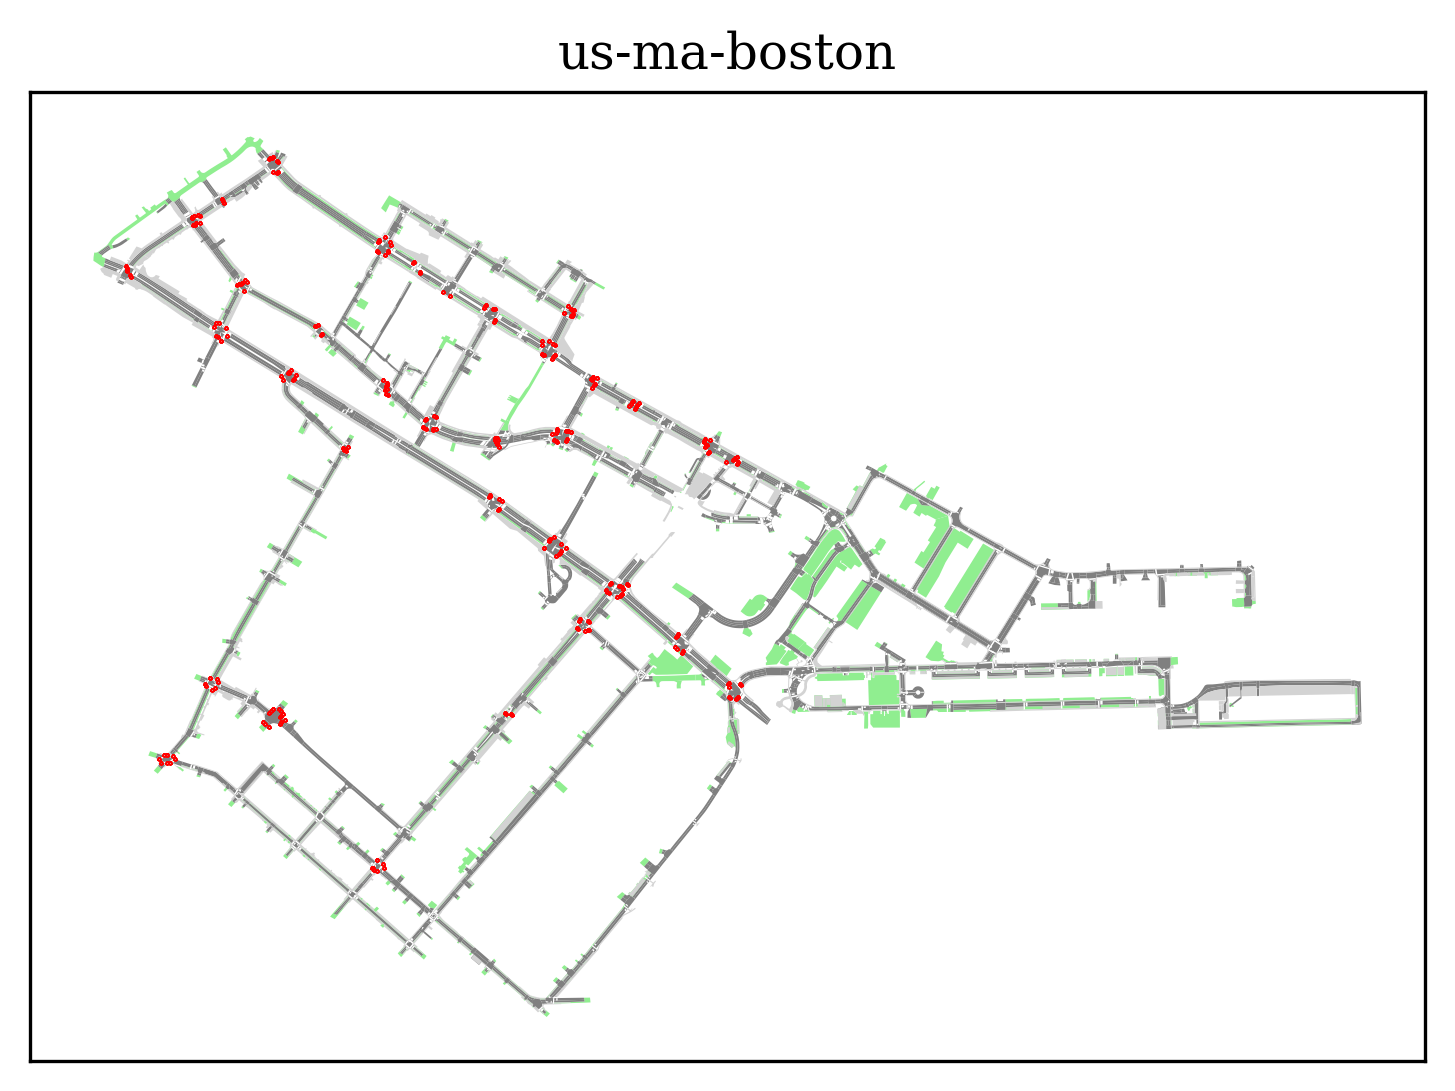

In [4]:
nuplan.plot_map(map_path, map_files[0])

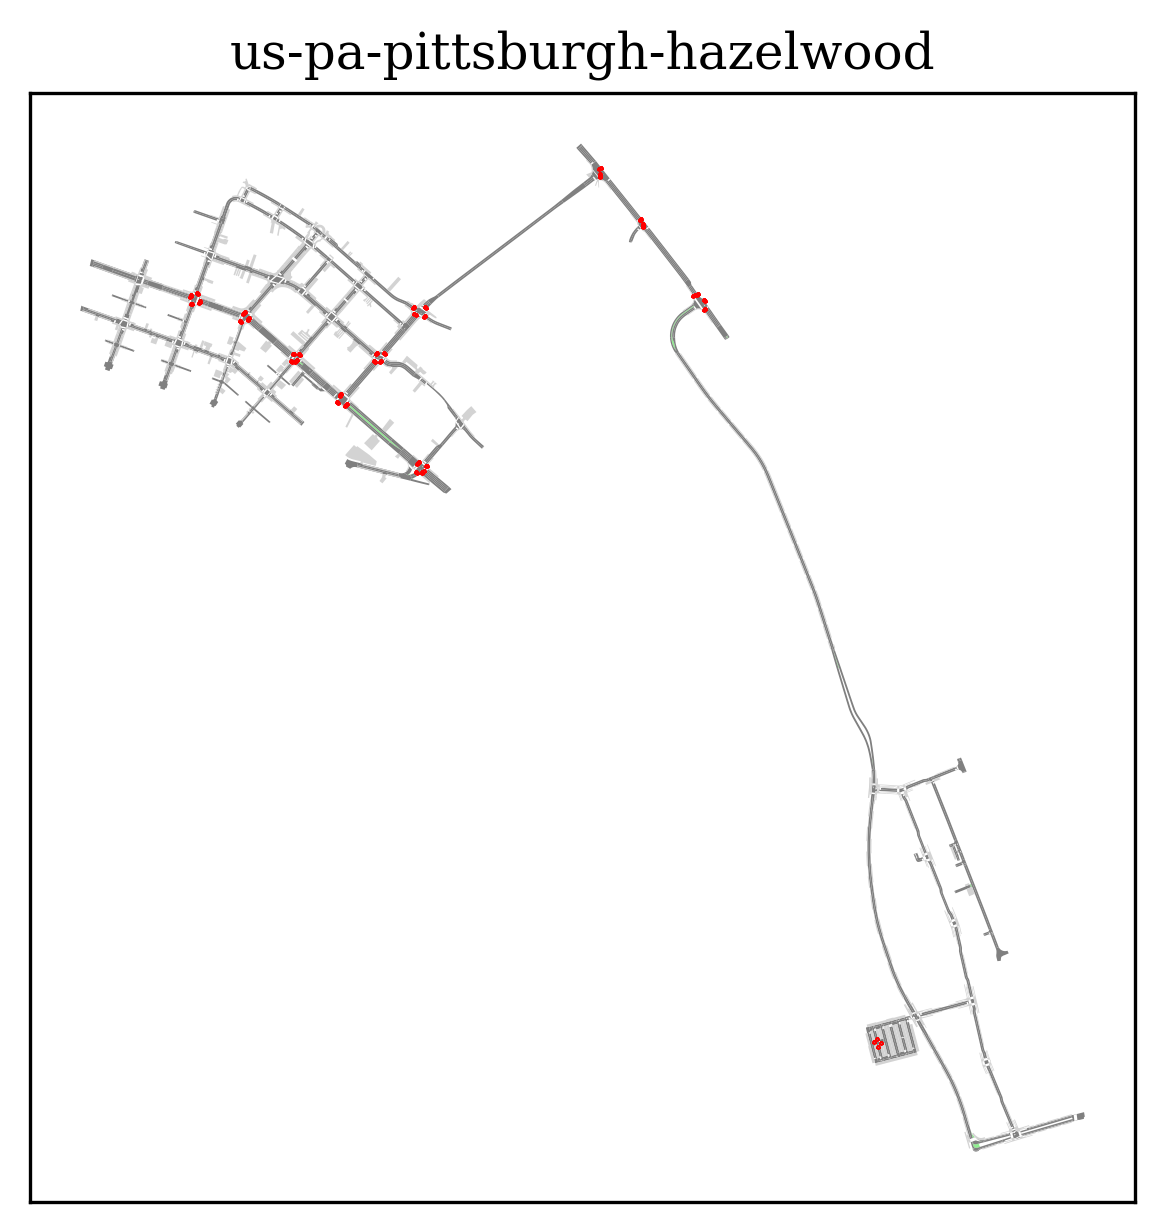

In [5]:
nuplan.plot_map(map_path, map_files[1])

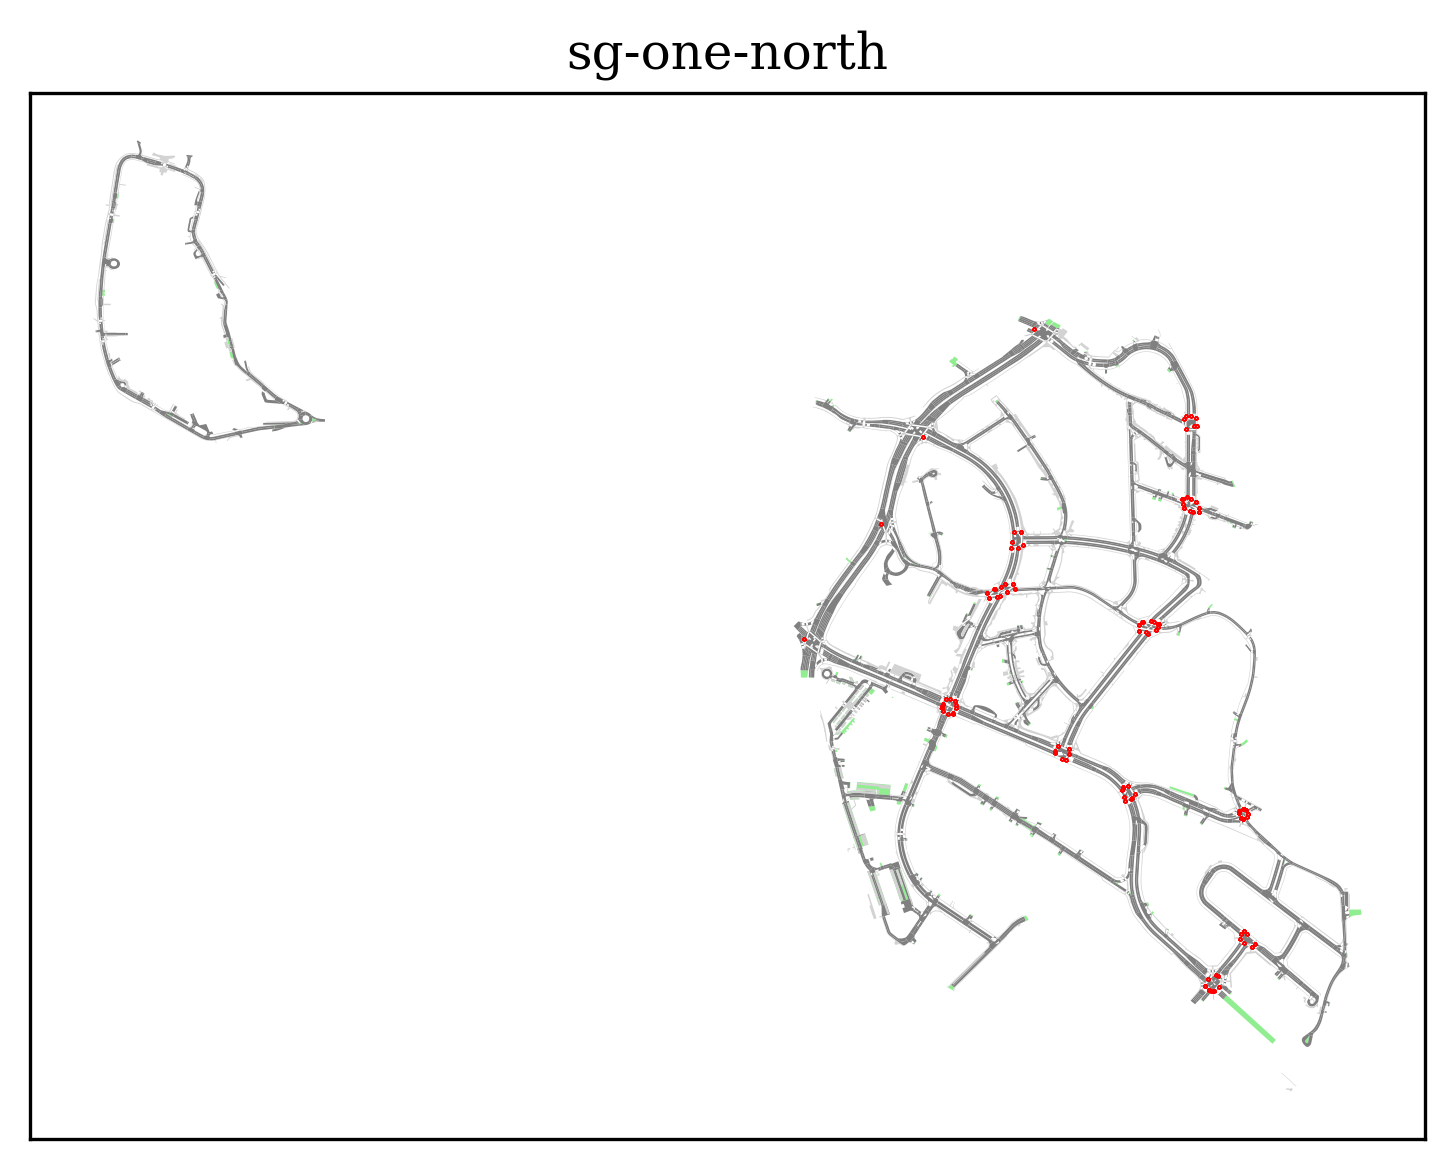

In [6]:
nuplan.plot_map(map_path, map_files[2])

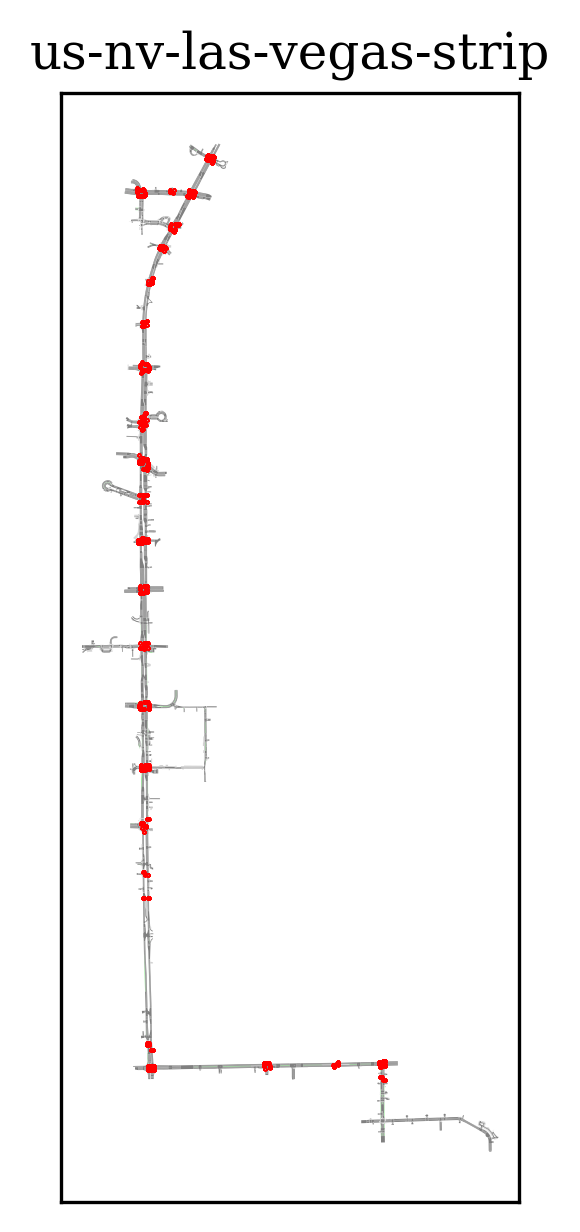

In [7]:
nuplan.plot_map(map_path, map_files[3])

### Trajectory Visualization

The trajectories in NuPlan dataset are collected from four different cities: Boston, Pittsburgh, Singapore, and Las Vegas. Each file encompasses trajectories obtained from a specific sub-region on the map. This dataset offers a diverse range of urban scenarios, including intersections, straight lanes, and entries or exits to parking lots.

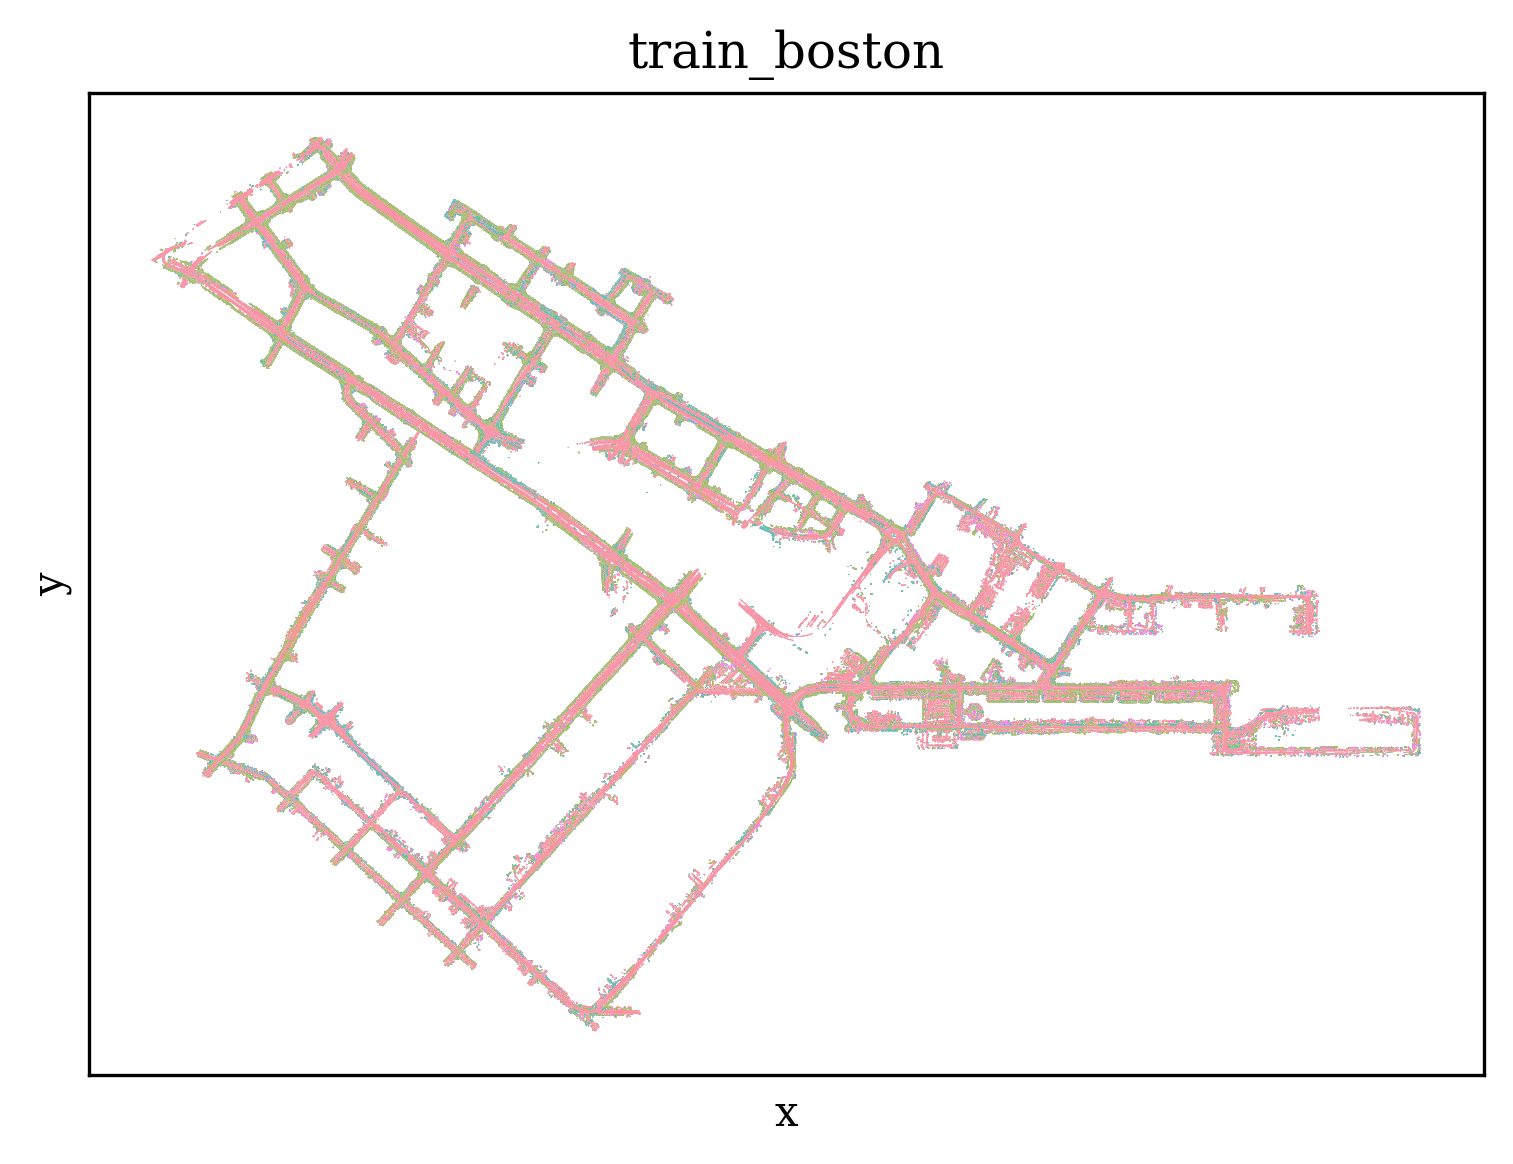

In [8]:
nuplan.plot_trajectories(data_path, trajectory_folders[0], trajectory_files[0])

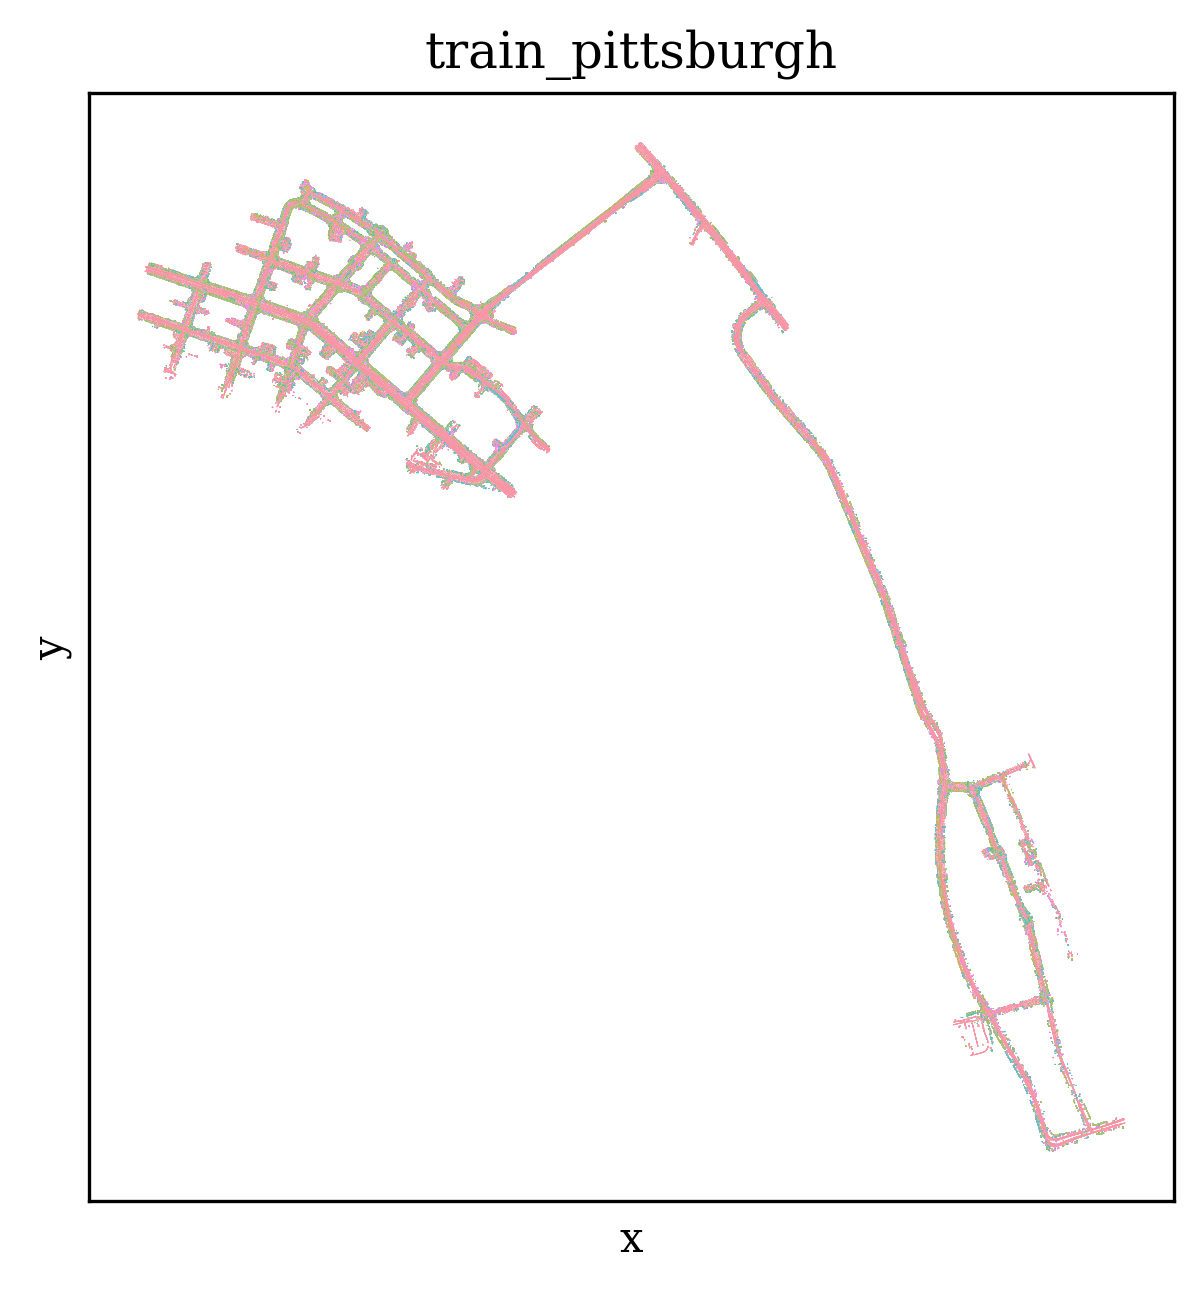

In [2]:
nuplan.plot_trajectories(data_path, trajectory_folders[1], trajectory_files[1])

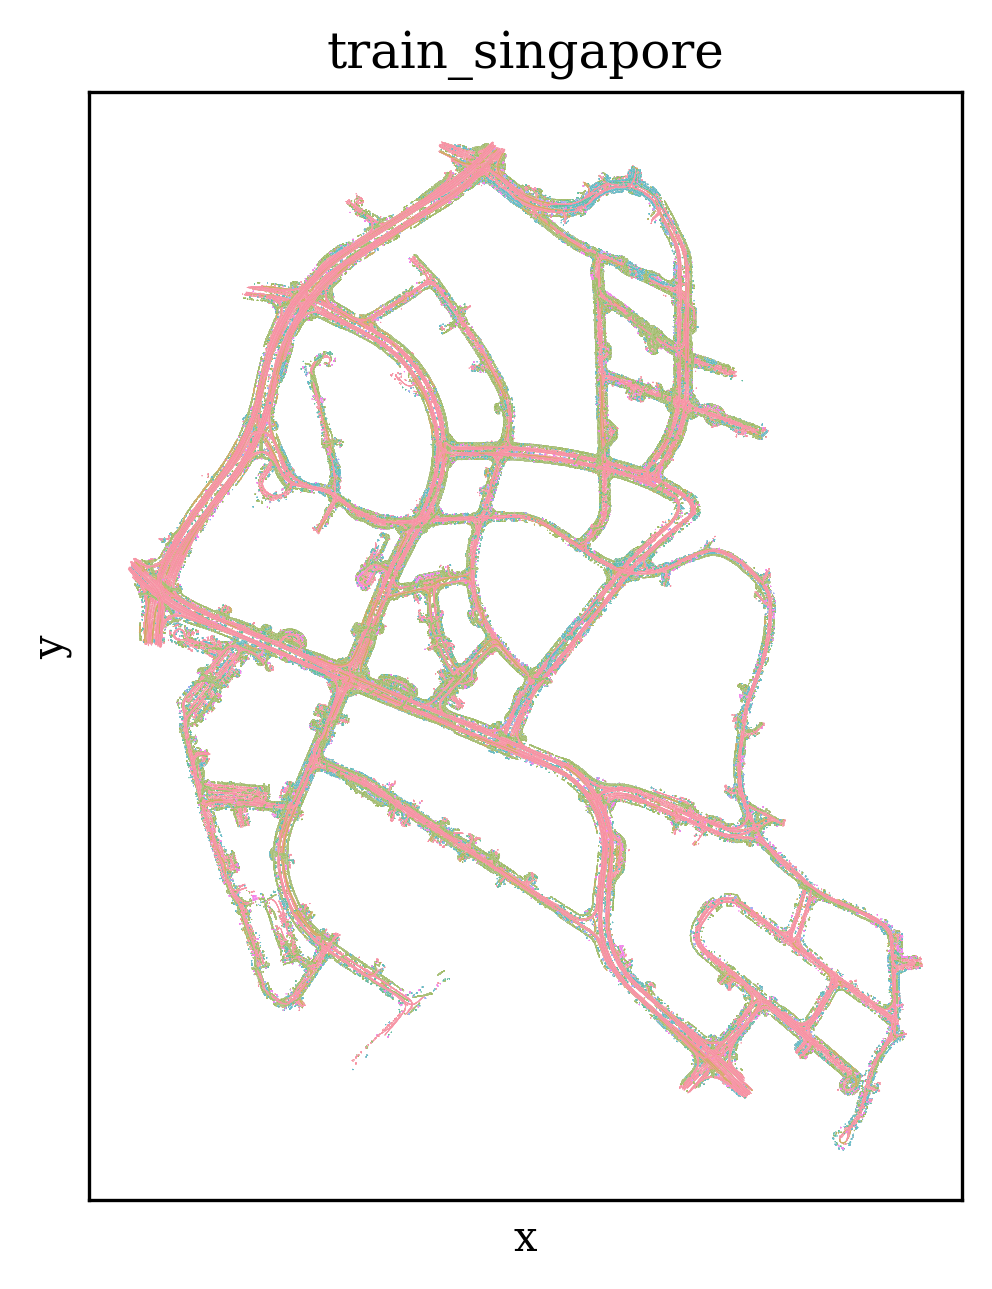

In [3]:
nuplan.plot_trajectories(data_path, trajectory_folders[2], trajectory_files[2])

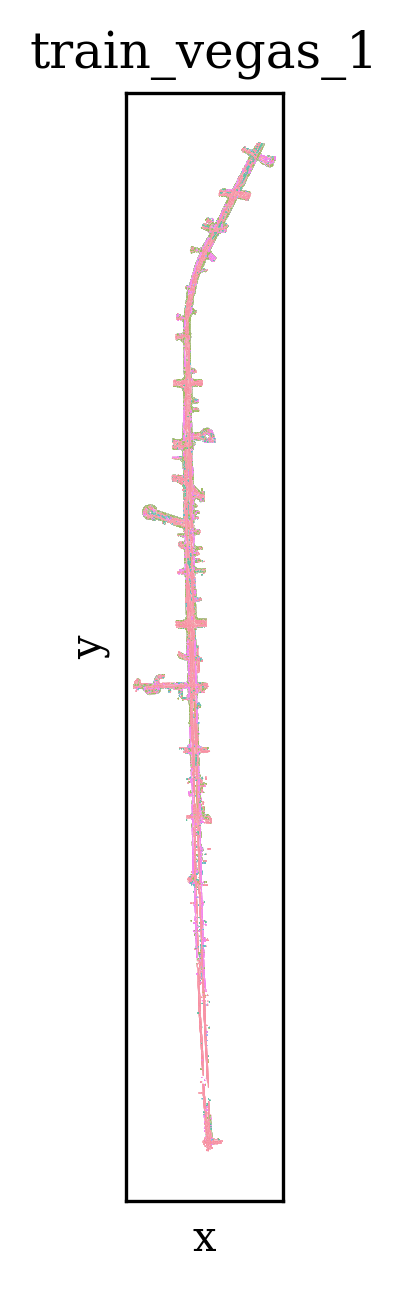

In [2]:
nuplan.plot_trajectories(data_path, trajectory_folders[3], trajectory_files[3], proportion=0.6)

### Proportion of Trajectory Types

In this analysis, our primary emphasis is on scrutinizing the distribution of dynamic objects, specifically focusing on `vehicle`, `bicycle`, `pedestrian`, and `generic_object`. Given the vast volume of trajectory databases at our disposal, we calculate proportions based on the location-level rather than the file-level. It's noteworthy that the distribution of dynamic objects exhibits significant variability across different locations.

Within the NuPlan dataset, the track data has a especially high proportion of pedestrians. This influx of pedestrian data has the potential to increase complexity to the traffic scenarios, thereby presenting more challenging dynamics for analysis and understanding.

In [3]:
all_trajectory_folders = trajectory_folders + [val_folder] + [test_folder]
all_trajectory_files = trajectory_files + [val_file_list] + [test_file_list]

                 vehicle bicycle pedestrian generic_object
train_boston         780      28        645            278
train_pittsburgh     652      25        181            261
train_singapore       23       2         52             41
train_vegas_1       1298      63       2001           2016
val                  149       8        153             25
test                 444       7        129            556


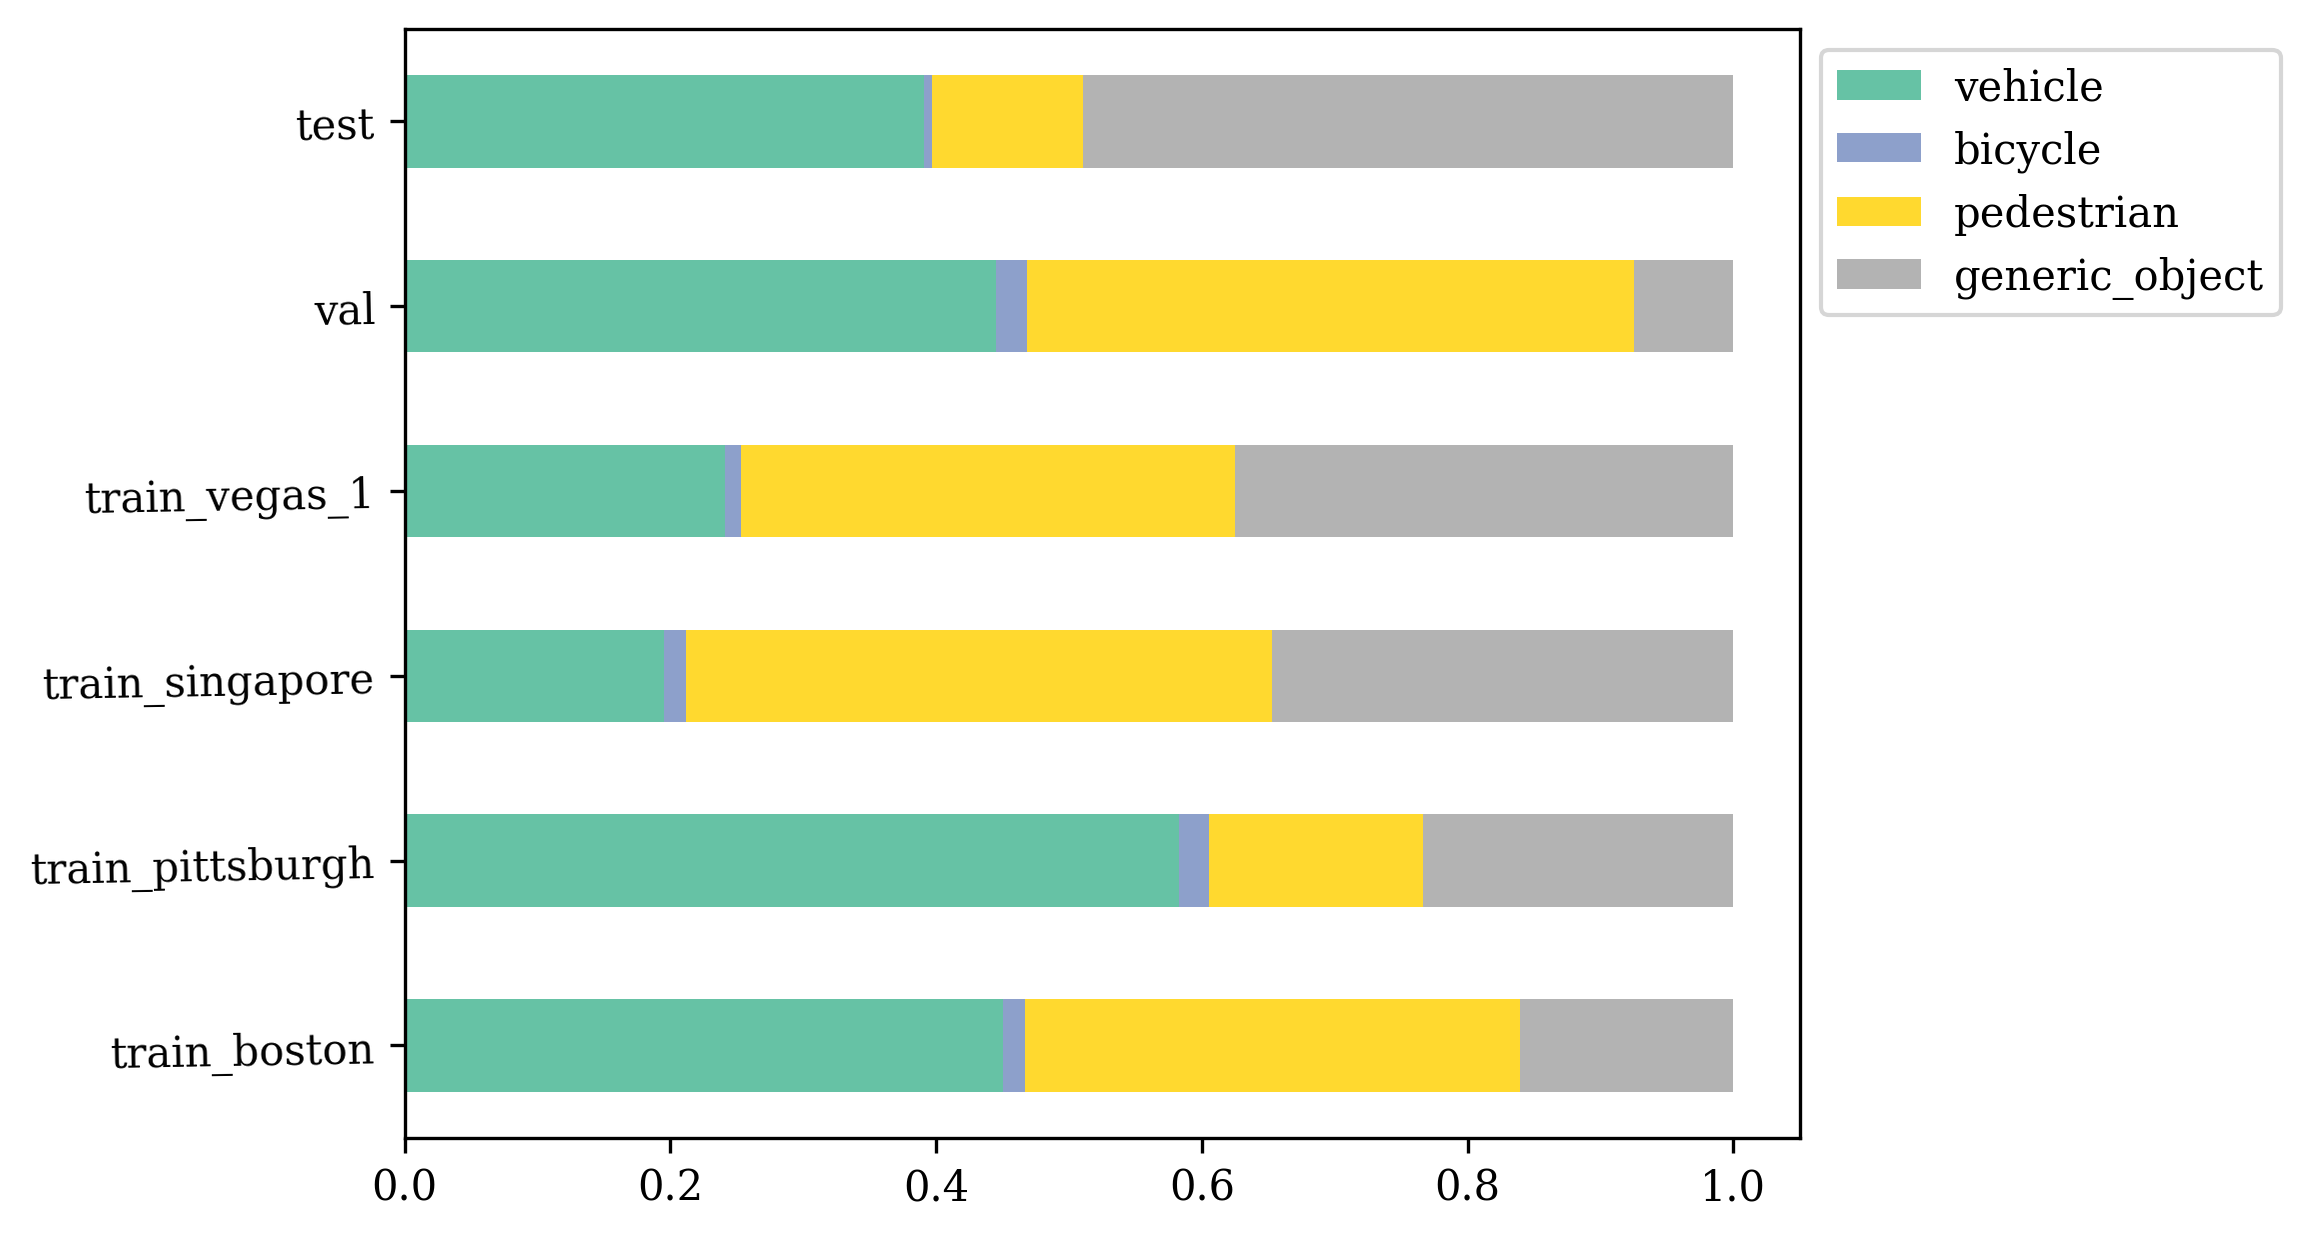

In [5]:
nuplan.plot_class_proportion(data_path, all_trajectory_folders, all_trajectory_files)

### Speed Distribution

The mean speed distribution are similar across the locations and subsets. Given that all trajectories are gathered within scenarios characterized by crowded and dense pedestrian flows, the majority of vehicles operate at lower speeds. This characteristic distinguishes the NuPlan dataset, highlighting its unique focus on such urban conditions.

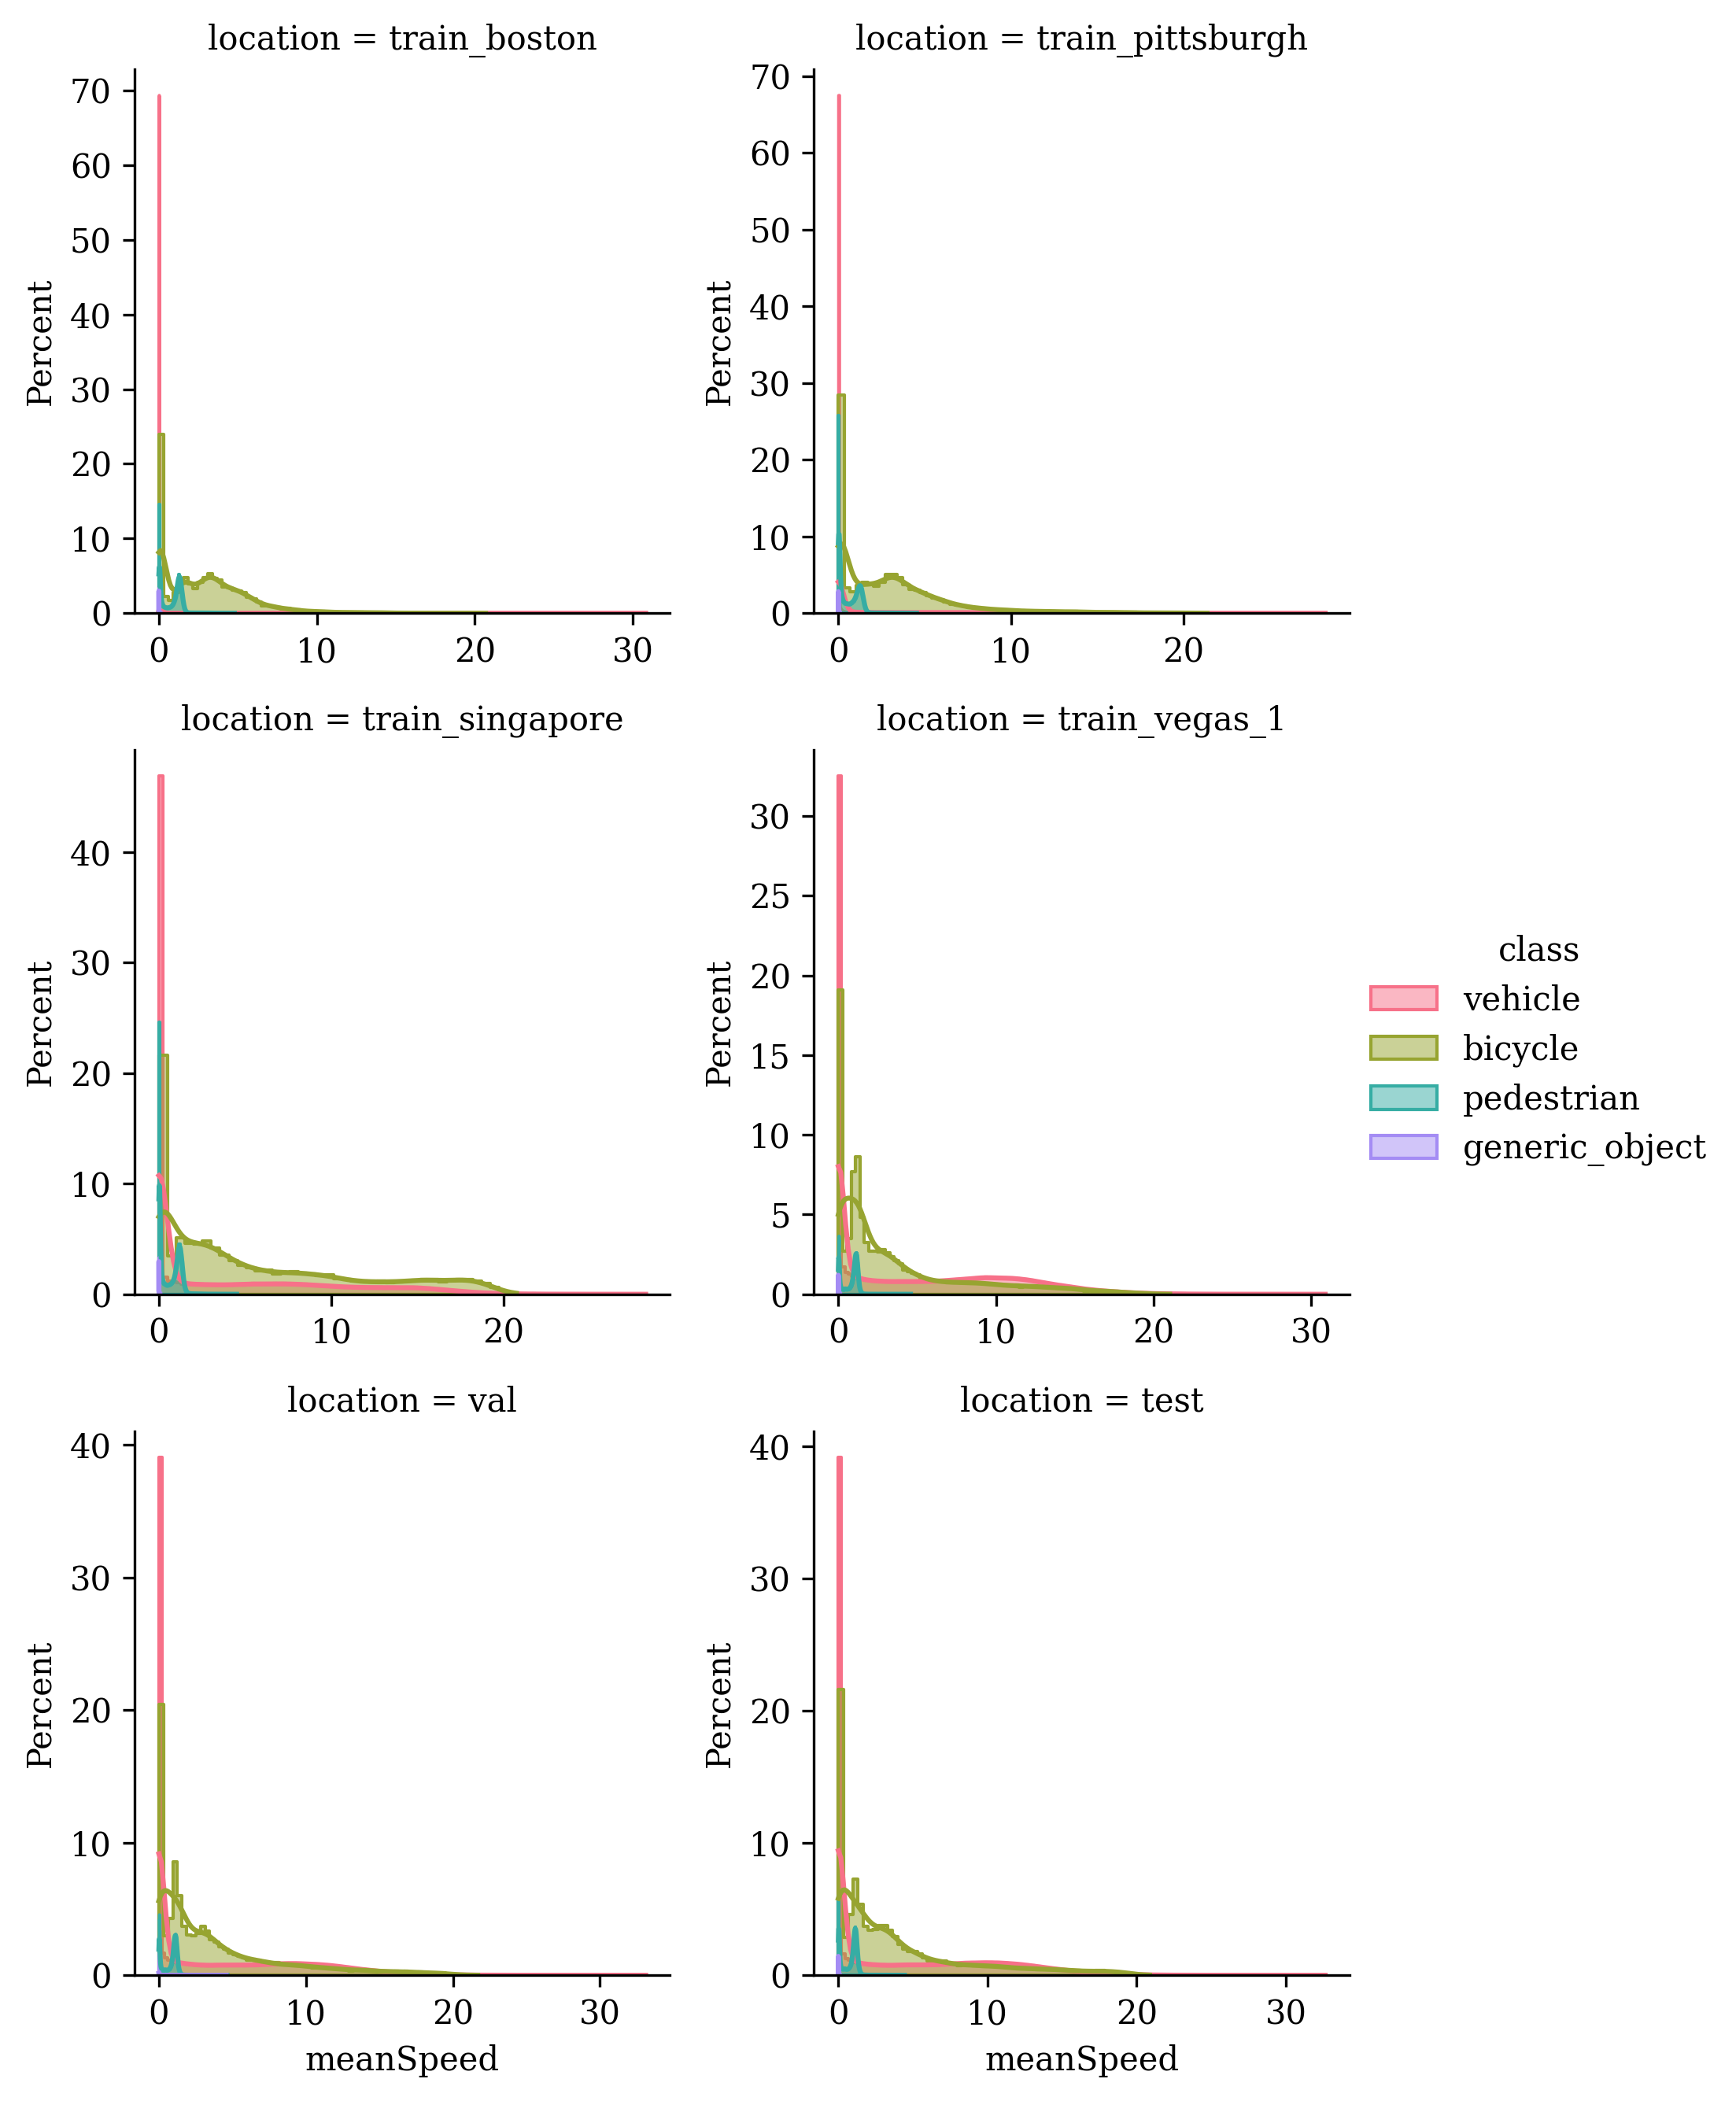

In [4]:
nuplan.plot_mean_speed_distribution(data_path, all_trajectory_folders, all_trajectory_files)

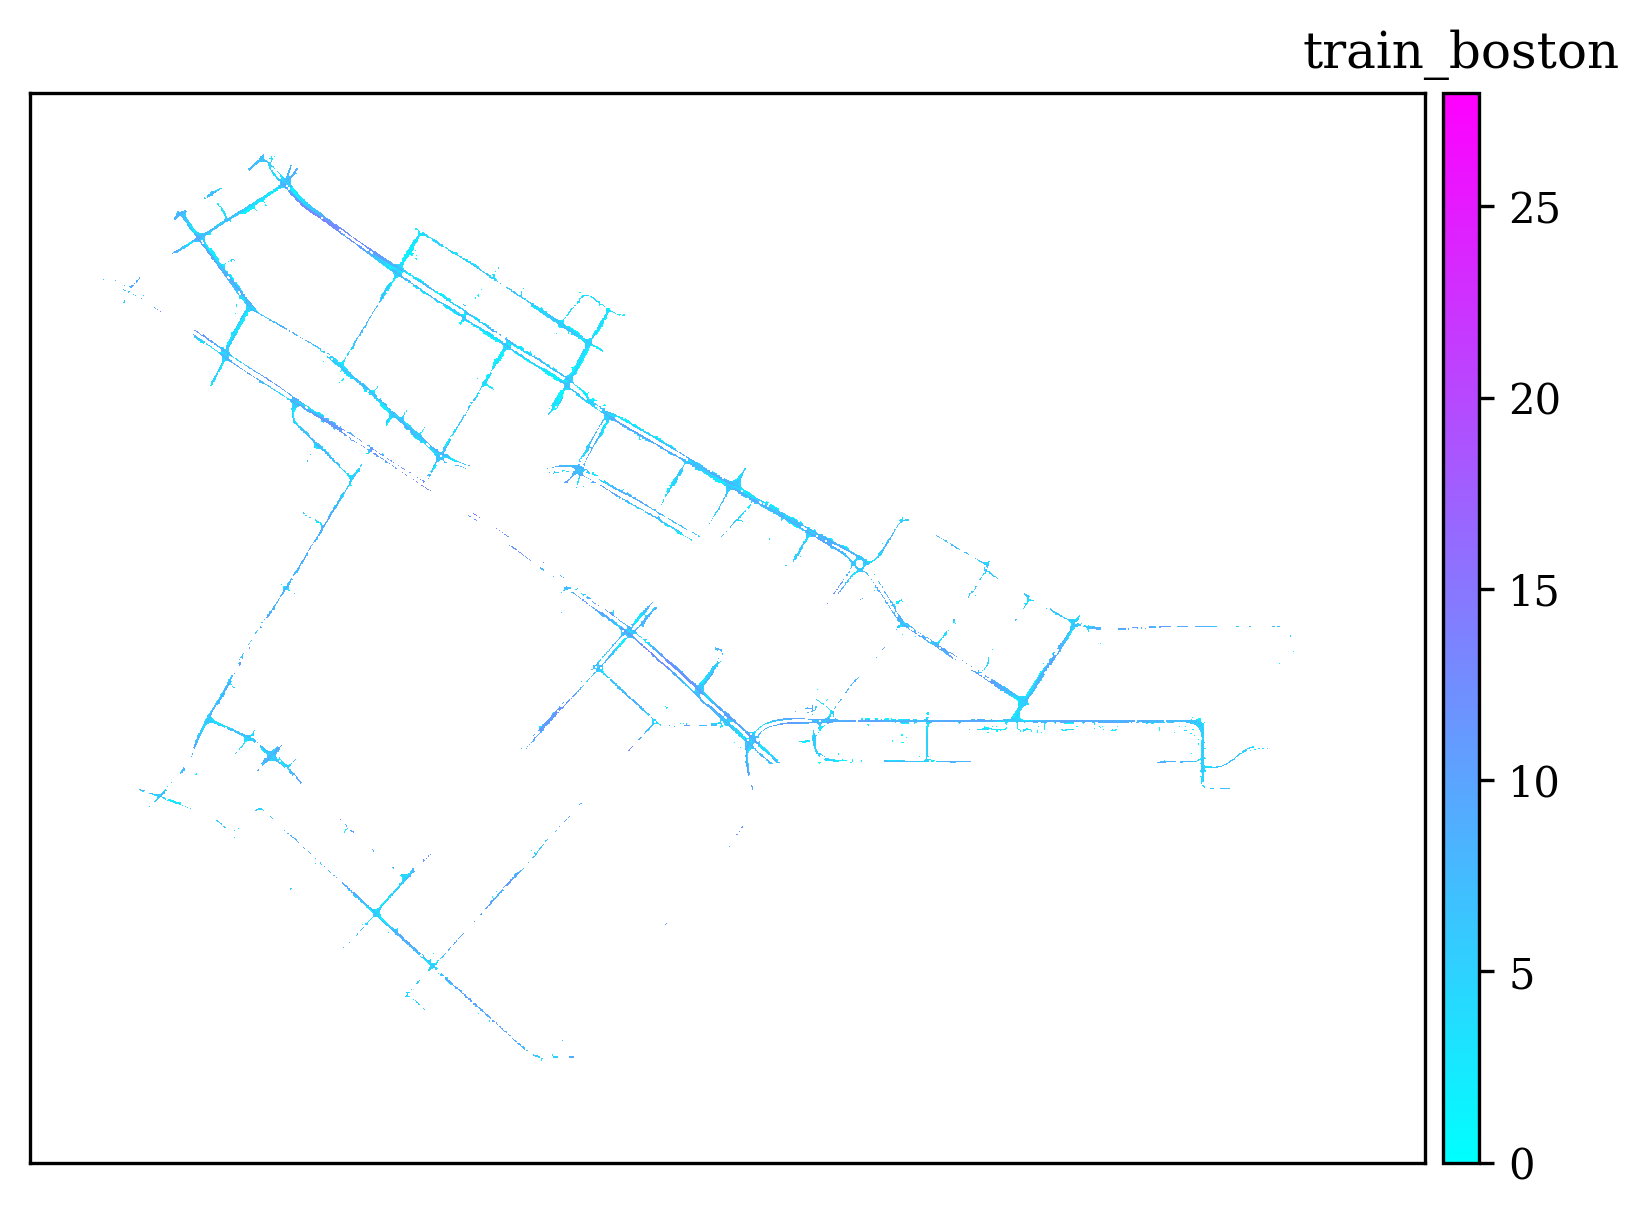

In [2]:
map_boundary_boston = [330500, 333500, 4689100, 4691400]
nuplan.plot_speed_distribution(
    map_boundary_boston, data_path, trajectory_folders[0], trajectory_files[0]
)

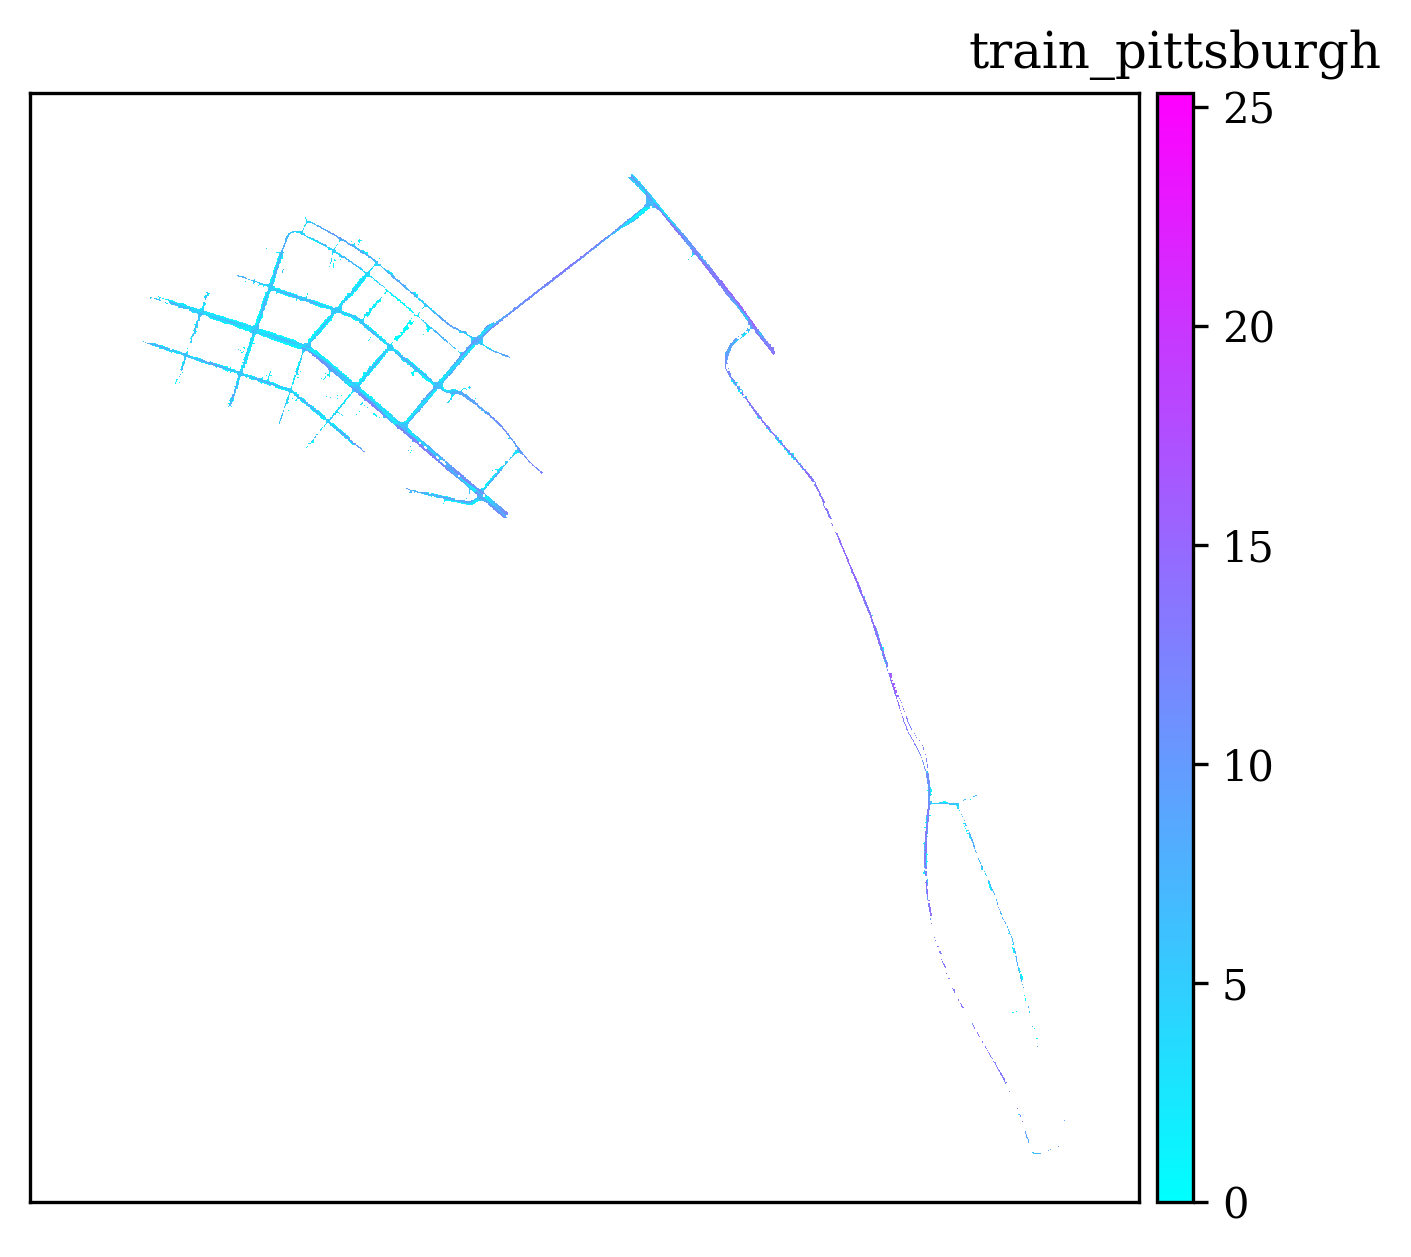

In [2]:
map_boundary_pittsburgh = [587000, 589500, 4473750, 4476250]
nuplan.plot_speed_distribution(
    map_boundary_pittsburgh, data_path, trajectory_folders[1], trajectory_files[1]
)

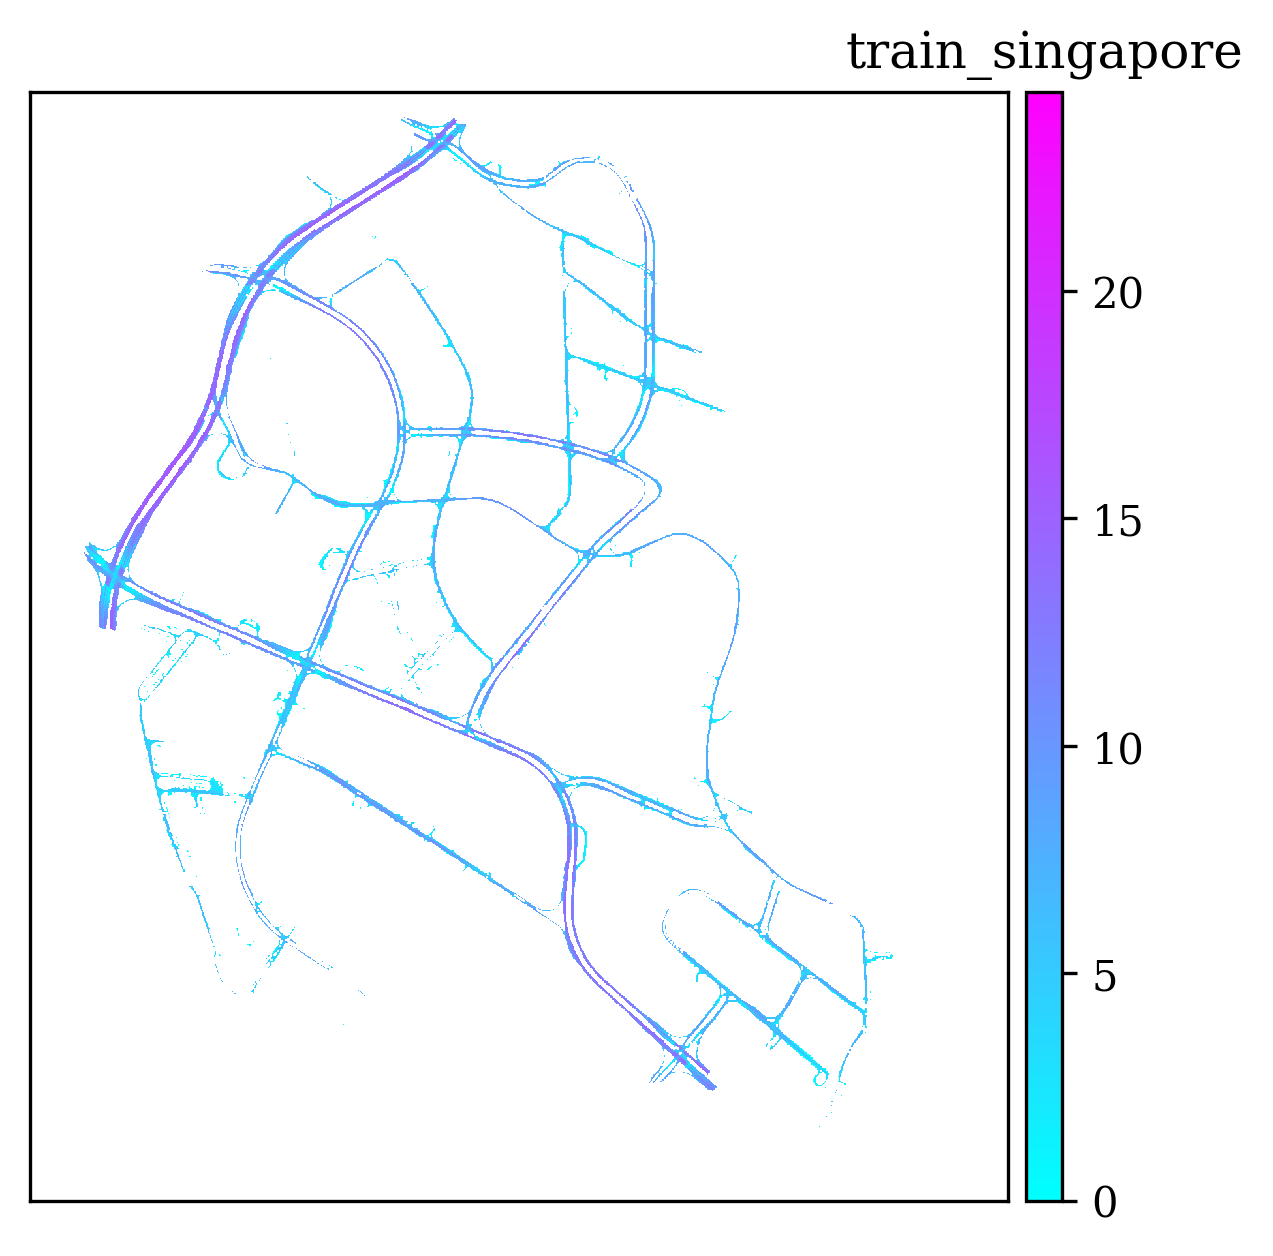

In [4]:
map_boundary_pittsburgh = [364750, 366250, 142700, 144400]
nuplan.plot_speed_distribution(
    map_boundary_pittsburgh, data_path, trajectory_folders[2], trajectory_files[2]
)

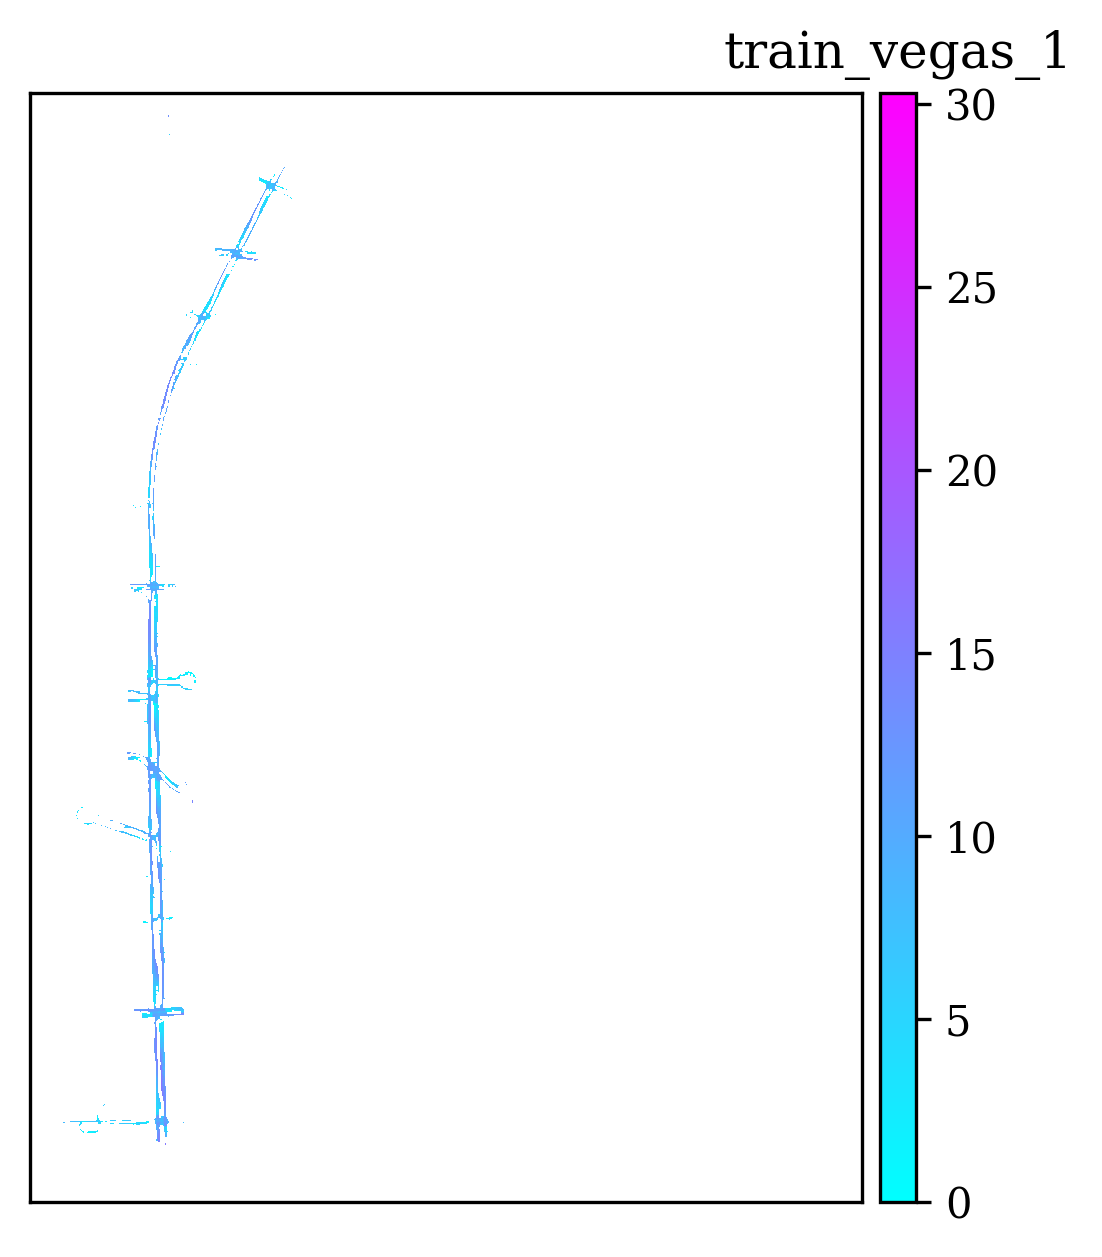

In [3]:
map_boundary_pittsburgh = [664000, 667000, 3996000, 4000000]
nuplan.plot_speed_distribution(
    map_boundary_pittsburgh, data_path, trajectory_folders[3], trajectory_files[3], proportion=0.6
)